In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/sample_data/tested[1].csv')

print(data.head())

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

if 'Survived' in data.columns:
    y = data['Survived']
    data.drop(columns=['Survived'], inplace=True)
else:
    raise ValueError("The dataset must contain a 'Survived' column as the target variable.")


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

def classify_passenger(passenger_data):

    passenger_data['Age'].fillna(data['Age'].median(), inplace=True)
    passenger_data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    passenger_data['Fare'].fillna(data['Fare'].median(), inplace=True)
    passenger_data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)


    passenger_data['Sex'] = passenger_data['Sex'].map(lambda x: le_sex.transform([x])[0] if x in le_sex.classes_ else -1)
    passenger_data['Embarked'] = passenger_data['Embarked'].map(lambda x: le_embarked.transform([x])[0] if x in le_embarked.classes_ else -1)

    X_new = passenger_data[features]
    X_new = scaler.transform(X_new)
    predictions = model.predict(X_new)
    return predictions

new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S']
})

new_passenger['Sex'] = new_passenger['Sex'].map(lambda x: le_sex.transform([x])[0] if x in le_sex.classes_ else -1)
new_passenger['Embarked'] = new_passenger['Embarked'].map(lambda x: le_embarked.transform([x])[0] if x in le_embarked.classes_ else -1)

new_passenger_scaled = scaler.transform(new_passenger[features])

prediction = model.predict(new_passenger_scaled)
print(f'New passenger prediction: {"Survived" if prediction == 1 else "Did not survive"}')


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Training set shape: (334, 7)
Test set shape: (84, 7)
Accuracy: 1.0
Classification Repo

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Training set shape: (334, 7)
Test set shape: (84, 7)
Accuracy: 1.0
Classification Repo

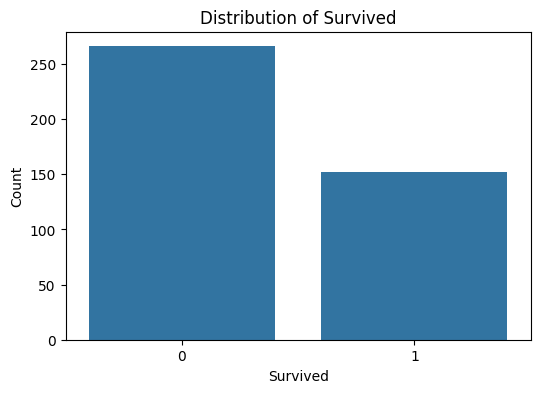

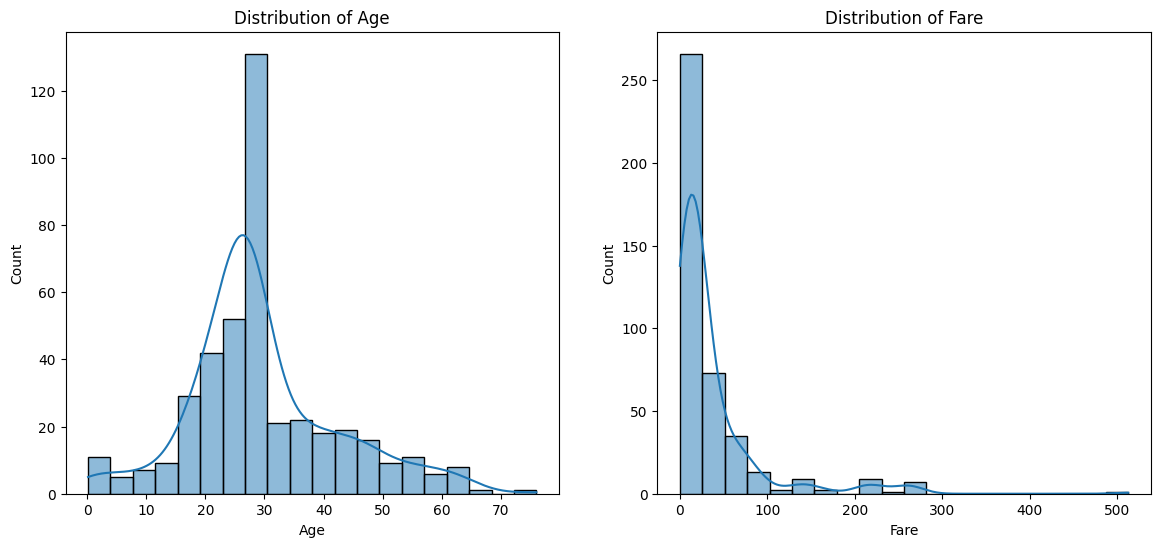

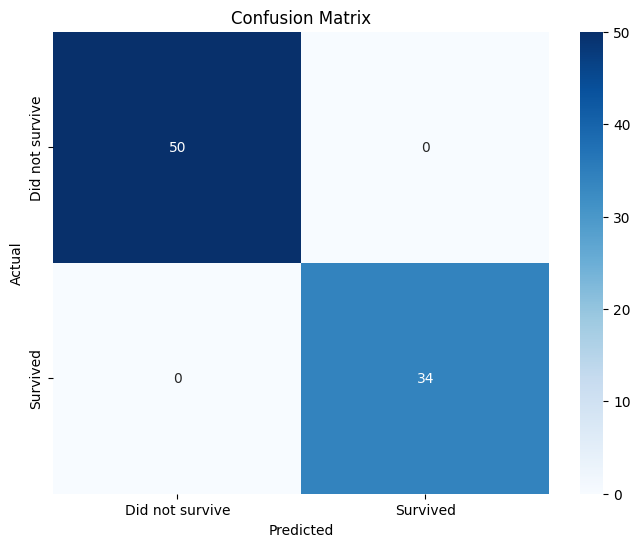

New passenger prediction: Did not survive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/sample_data/tested[1].csv')

print(data.head())


data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

if 'Survived' in data.columns:
    y = data['Survived']
    data.drop(columns=['Survived'], inplace=True)
else:
    raise ValueError("The dataset must contain a 'Survived' column as the target variable.")


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

numerical_features = ['Age', 'Fare']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

def classify_passenger(passenger_data):

    passenger_data['Age'].fillna(data['Age'].median(), inplace=True)
    passenger_data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    passenger_data['Fare'].fillna(data['Fare'].median(), inplace=True)
    passenger_data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

    passenger_data['Sex'] = passenger_data['Sex'].map(lambda x: le_sex.transform([x])[0] if x in le_sex.classes_ else -1)
    passenger_data['Embarked'] = passenger_data['Embarked'].map(lambda x: le_embarked.transform([x])[0] if x in le_embarked.classes_ else -1)

    X_new = passenger_data[features]
    X_new = scaler.transform(X_new)
    predictions = model.predict(X_new)
    return predictions

new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S']
})

new_passenger['Sex'] = new_passenger['Sex'].map(lambda x: le_sex.transform([x])[0] if x in le_sex.classes_ else -1)
new_passenger['Embarked'] = new_passenger['Embarked'].map(lambda x: le_embarked.transform([x])[0] if x in le_embarked.classes_ else -1)

new_passenger_scaled = scaler.transform(new_passenger[features])

prediction = model.predict(new_passenger_scaled)
print(f'New passenger prediction: {"Survived" if prediction == 1 else "Did not survive"}')
